## Elizabeth Daly 
## HDip Data Analytics 2020

### Machine Learning & Statistics Tasks
***

## 1: Function to calculate the square root of 2 to 100 decimal places 
***

### Introduction

For this task, we have been asked to compute the square root of 2, to 100 decimal places, without using any imported module, or any module from the standard library in Python. There is indeed a math module that could be used to compute $\sqrt 2$ easily, but we will only use it to provide a comparison with our solution later on <span style='color:red'> [1] </span>.
Common methods to calculate square roots start by providing an initial guess for the square root, and then iterating through an algorithm to produce a better guess each time through the algorithm <span style='color:red'> [2] </span>. Iteration stops when a required accuracy or tolerance is reached, or when some maximum number of iterations has taken place for slowly-converging algorithms.

### Newton's method

Newton's method is a very common approach and the one we will use for this task <span style='color:red'> [3, 4, 5] </span>. It can be used to calculate the square root $s$ of a number $x$, where $x \gt 0$ and $s = \sqrt x $. Starting with an initial guess for the square root, $s_0$, the algorithm computes a better guess using the formula

$$ s_{n+1} = s_n - \left ( \frac{s_n^2 - x}{2 s_n} \right ). $$

Here, $s_{n}$ is the previous estimate for the square root and $s_{n+1}$ is the updated/better estimate.

With Newton's method, setting the initial guess to be slightly larger than the root will result in slightly faster convergence than a guess that is slightly smaller than the root <span style='color:red'> [2] </span>. I have hard-coded the initial guess ($s_0 = 1$) into my algorithm because we have been asked to calculate the square root of a fixed number, $ x = 2$. In general, the initial guess should be between 1 and the number, and initial guesses closer to the root will converge faster. We already roughly know the answer to this task, $\sqrt 2 \approx 1.4$, and so an initial guess anywhere between 1 and 1.4 will work fine. Much more consideration of the initial guess would be required if we had been asked to calculate the square root of *any* number. The further the initial guess is from the actual answer, the more iterations are "wasted" just getting to the vicinity of the answer <span style='color:red'> [2] </span>.

In [1]:
def sqrt2(x = 2, a = 0.0000000001):
    """
    A function to calculate the square root of 2 to a desired accuracy a
    using Newton's method
    """
    # We are looking for the square root of 2 so make that the default value for x.
    # x = 2
    # Provide an initial guess, s, for the square root of 2.
    s = 1
    # set iteration count = 0
    iter = 0
    # Loop until desired accuracy reached.
    # i.e. Loop if |x-s*s| > required accuracy. Default value set if not provided.
    while abs(x - (s * s)) > a:
        # Now calculate a better guess for the square root of 2.
        s -= (s*s - x) / (2 * s)
        # Keep track of number of iterations required to meet desired accuracy.
        iter += 1
        # print(iter)
    # Return the (approximate) square root of 2 and number of iterations.
    return s, iter

Call the function sqrt2

In [2]:
# sqrt2 returns a tuple. 
# First element = sqrt(2); second = # iterations.
# Extract the answer, which is a floating point number.
ans = sqrt2()[0]
#type(ans)

# Extract the # iterations, which is an integer.
n = sqrt2()[1]
# type(n)

Now display the square root of 2 to 100 decimal places. For this we need to use string formatting.

In [3]:
# Just printing the answer does not provide enough decimal places for this task.  
print(ans)

print("Iteration count:", n)
# Use string formatting to display the correct number of decimal places.
format(ans, '.100f')   # give 100 digits after the decimal point


1.4142135623746899
Iteration count: 4


'1.4142135623746898698271934335934929549694061279296875000000000000000000000000000000000000000000000000'

### A little note about accuracy
I'm a tiny bit suspicious of all those zeros at the end of the number. We discussed in week 2 of this module how $\sqrt 2$ is an irrational number: it cannot be expressed as a ratio of two integers so its decimal expansion never becomes periodic. My algorithm is producing a periodic decimal expansion (repeated zeros), so although it's a very good approximation of $\sqrt 2$, it is not exactly $\sqrt 2$. The algorithm takes 4 iterations to converge with tolerance set to 0.0000000001. Newton's method has a quadratic rate of convergence, meaning that the number of correct bits, or decimal places, (n) doubles with each iteration; the required number of iterations is of order $O(\log_2 n)$ <span style='color:red'> [6] </span>. We have been asked for 100 decimal places, so we would need about $\log_2 100 \approx 4.6$ iterations However, the running time of this algorithm scales as $O( n (\log_2 n )^2)$ <span style='color:red'> [6] </span>. This implies that requiring 100 bits of precision will cause the algorithm to take about 2000 times longer to run than for 10 bits. In the code as written above, some improvement in accuracy can probably be achieved by decreasing tolerance, but it's not the only contributor to the precision of the answer. I might come back to this as I don't want to get bogged down at this stage. The main reason for the rational appearance of $\sqrt 2$ comes from the fact that computers store numbers and do arithmetic in floating point format <span style='color:red'> [7] </span>. I found a Stack Overflow post that explains this really well using the easy-to-understand example of repeatedly halving a pizza <span style='color:red'> [8] </span>. You can do the halving 53 times before the slice is too small for even a high-precision cutter. At that point, you can no longer halve that very thin slice, but must either include or exclude it as is. So, eventually, when the slices (numbers) get very very small, it becomes impossible to halve each slice exactly, and so errors begin to creep into the process. Numbers in the computer are stored as binary fractions, and most decimal fractions (and especially irrational numbers like $\sqrt 2$) cannot be expressed as binary fractions. The actual stored value on the computer is the nearest representable binary fraction. It's not a big problem most of the time, as the errors are typically no more than 1 part in $2^{53}$ per operation. This document recommends using the Python decimal module for high-precision applications <span style='color:red'> [9] </span>. Although calculating the $\sqrt 2$ is not a high-precision application, I will do it here for comparison.

First, compare this answer to what the Python math module produces [10].

In [4]:
# import the math module  
import math  
  
# print the square root of  0  
print(format(math.sqrt(2), '.100f'))

# What's the difference?
# print(format(math.sqrt(2) - sqrt2()[0], '.100f'))

1.4142135623730951454746218587388284504413604736328125000000000000000000000000000000000000000000000000


The answer is almost identical to one produced by our algorithm, but not quite. Why? I guess it must be because of floating point errors as the number of decimal places increases. The math module provides access to C library functions - I'm not going to pursue this here, but I wasn't able to find which algorithm is used in the math.sqrt() function. The answer also has a lot of zeros at the end of the number. Clearly this function is also producing only an approximation to the answer because of the way that floating point numbers are stored on the computer. 

Lastly, look at the Python decimal module for another comparison <span style='color:red'> [11] </span>. The answer looks "better" in that it doesn't end with repeated patterns of numbers. However, no matter how many numbers of precision I specify (I tried up to 10000), it never produces a number that looks rational to the eye anyway. Hence, I suppose, supporting the notion that $\sqrt 2$ is irrational. 

In [5]:
from decimal import *
getcontext().prec = 100 # Can try other numbers here
Decimal(2).sqrt()

Decimal('1.414213562373095048801688724209698078569671875376948073176679737990732478462107038850387534327641573')

### Are any of these answers correct?

The correct answer for $\sqrt 2$ can be found in Sequence A002193 in the On-Line Encyclopedia of Integer Sequences, which is linked to in <span style='color:red'> [12] </span>. The correct value, to 65 decimal places is shown in the snip below. 
- Our sqrt2 algorithm above produces $\sqrt 2 = \mathbf{1.41421\: 35623\: 7}4689\: 86982 ...$ Here I have highlighted in bold the digits which are considered to be accurate for four iterations of our algorithm <span style='color:red'> [12] </span>.
- The Python math module produces $\sqrt 2 = 1.41421\: 35623\: 73095\: 14547 ...$. I have no idea how many of these digits are accurate as I don't know the details of the algorithm used. However, I'll guess that more of them are accurate than our own algorithm as they match with the actual answer below for 15 decimal places.
- The Python decimal module produces $\sqrt 2 = 1.41421\: 35623\: 73095\: 04880\: 16887\: 24209\: 69807\: 85696\: 71875\: 37694\: 80731\: 76679\: 73799\: ...$

<img src="img/sqrt2.JPG">

So our own algorithm is correct to 11 decimal places, the math module to 15 decimal places, and the decimal module produces an answer that is correct to at least 65 decimal places.

### Conclusion for Task 1
Completing this task forced me to think about floating point errors more than I ever had before. The easy part was coding the algorithm to find $\sqrt 2$. The more difficult part was coming to the realization that, even if the tolerance for convergence is very small, it doesn't make the answer more precise. In fact, all it does is force the algorithm to take a very long time to produce an estimate for $\sqrt 2$. I imported some modules purely so that I could compare my answer with other methods. The Python math.sqrt() function produces a slightly better estimate for $\sqrt 2$, while the decimal module produces the most digits of precision. The conclusion must be that floating point errors might sometimes be a factor to consider when doing calculations on a computer with very small numbers or where high precision is required.

### References for Task 1
<span style='color:red'> [1] </span> The Python Standard Library; Numeric and Mathematical Modules; https://docs.python.org/3/library/math.html

<span style='color:red'> [2] </span> Methods of computing square roots; Wikipedia; https://en.wikipedia.org/wiki/Methods_of_computing_square_roots

<span style='color:red'> [3] </span> Exercise: Loops and Functions: A Tour of Go; https://tour.golang.org/flowcontrol/8

<span style='color:red'> [4] </span> Newton's Method; Mathematical Python; https://www.math.ubc.ca/~pwalls/math-python/roots-optimization/newton/

<span style='color:red'> [5] </span> S. G. Johnson, MIT Course 18.335, February 4, 2015; Square Roots via Newton’s Method; https://math.mit.edu/~stevenj/18.335/newton-sqrt.pdf

<span style='color:red'> [6] </span> Arbitrary precision integer square root algorithm?; StackExchange Computer Science; https://cs.stackexchange.com/questions/37596/arbitrary-precision-integer-square-root-algorithm

<span style='color:red'> [7] </span> Floating Point Arithmetic: Issues and Limitations; The Python Tutorial; https://docs.python.org/3/tutorial/floatingpoint.html

<span style='color:red'> [8] </span> Is floating point math broken?; Stack Overflow; https://stackoverflow.com/questions/588004/is-floating-point-math-broken

<span style='color:red'> [9] </span> how can i show an irrational number to 100 decimal places in python?; Stack Overflow;
https://stackoverflow.com/questions/4733173/how-can-i-show-an-irrational-number-to-100-decimal-places-in-python

<span style='color:red'> [10] </span> math — Mathematical functions; The Python Standard Library; https://docs.python.org/3/library/math.html

<span style='color:red'> [11] </span> decimal — Decimal fixed point and floating point arithmetic; The Python Standard Library; https://docs.python.org/3/library/decimal.html

<span style='color:red'> [12] </span> Square root of 2; Wikipedia; https://en.wikipedia.org/wiki/Square_root_of_2 (Accessed 1 Nov. 2020).

## 2: The Chi-squared statistical test for independence
***

### Introduction
For this task we have been asked to verify the Chi-squared test statistic for data presented on a Wikipedia page <span style='color:green'> [1 wiki chi2] </span>. The data is presented in the form of a **contingency table**: a frequency distribution table used to summarize the relationship between several categorical variables <span style='color:green'> [2 stathow] </span>. Recall that a categorical variable is one that has two or more categories, but there is no intrinsic ordering to the categories <span style='color:green'> [3 catv] </span>. A typical example might be gender, which has two possible values (traditionally anyway) of male and female. The Chi-squared test can be carried out on a contingency table to check if there is any relationship between the categorical variables. It does so by comparing the observed frequencies of each variable with what we would expect if the variables were truly independent of one another <span style='color:green'> [4 ssChi2] </span>. 

### The Chi-squared test
The table we have been asked to analyze presents two categorical variables: Occupation, with possible values [White collar, Blue collar, No collar] and Neighborhood, with possible values [A, B, C, D]. Each row of the table corresponds to an occupation and each column corresponds to a neighborhood. The numbers in each cell contain the observed frequencies, corresponding to the intersection of two variable values. We will use the Chi-squared test of independence to check for a statistically significant relationship between occupation and neighborhood of residence in the data presented. Imagine a city of 1,000,000 residents with four neighborhoods: [A, B, C, and D]. A random sample of 650 residents of the city is taken and their occupation is recorded as [White collar, Blue collar, or No collar]. The data are summarized below. The null hypothesis for this test is that a person's neighborhood of residence is independent of their occupation. In this notebook, we will test the null hypothesis. In order to do so we must perform some calculations.

<img src="img/contingency.JPG">

Let's do some of the required calculations by hand. We want to calculate the expected frequency in each cell of the table, assuming that the null hypothesis is true and the variables are indeed independent.

Row 1, column 1:
- The observed value (o = 90) is the number of people who live in Neighborhood A and whose occupation is White collar.
- Use the sample living in neighborhood A (total for column A = 150) to estimate what proportion of the total 1,000,000 live in A. 
- Use the sample which are White collar (total for row White collar = 349) to estimate what proportion of the total 1,000,000 are White collar.
- If neighborhood and occupation are independent of each other (the null hypothesis holds true), the expected proportion of the total 1,000,000 who are White collar and live in neighborhood A is given by:
$e = 150 x \frac{349}{650} \approx 80.54$
- For that cell of the table (row 1, col 1) we calculate the Chi-square squared statistic as follows:
$\frac {(o - e)^2} {e} = \frac {(90 - 80.54)^2}{80.54} \approx 1.11$, where o and e are the observed and expected values, respectively.

Row 3, column 3:
- The observed value (o = 45) is the number of people who live in Neighborhood C and whose occupation is No collar.
- The total for column C (200) is an estimate of the proportion of the total 1,000,000 who live in C.
- Use the sample which are No collar (total for row No collar = 150) to estimate what proportion of the total 1,000,000 are No collar.
- Once again, if neighborhood and occupation are independent (the null hypothesis holds true), we expect the proportion of the total 1,000,000 which are No collar and live in neighborhood C to be given by:
- $e = 200 x \frac{150}{650} \approx 46.15$
- For that cell of the table (row 3, col 3) we again calculate the Chi-squared statistic:
$\frac {(o - e)^2} {e} = \frac {(45 - 46.15)^2}{46.15} \approx 0.03$

This quantity is calculated for every cell of the table. The sum over all cells is the test statistic. This test statistic has approximately a Chi-squared distribution whose number of degrees of freedom (dof) is given by:

dof = (# rows -1)(# columns -1) = (3 -1)(4 -1) = 2 x 3 = 6.

The measured test statistic is evaluated by comparing it against some critical value in this Chi-squared distribution. A simple example is presented in <span style='color:green'> [5 mathfun] </span>. I find it easier to think in terms of probabilities, so I would like to convert this test statistic into a so-called p-value, used to determine the significance of a hypothesis test <span style='color:green'> [6 pval] </span>. The dof and the text statistic are combined to produce a p-value which is compared against a significance level <span style='color:green'> [7 pcalc] </span>. The usual test for significance is a p-value < 0.05: if p < 0.05, the result is significant, we reject the null hypothesis and we cannot assume that the categorical variables are independent. It is possible to chose a lower significance level, meaning that you require more evidence to reject the null hypothesis. More on this later maybe (Type I and Type II errors).

### Import required packages

In [6]:
# For statistics
import scipy.stats as ss
# For plotting
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 8.0) # Make nice big figures
# For arrays
import numpy as np

We can use NumPy to plot the probability density function (pdf) for a Chi-squared distribution with six degrees of freedom <span style='color:green'> [8 numpy] </span>. How can we relate this to our data? Well, the cumulative distribution function (cdf) is the probability that the variable (in our case = the test statistic) takes a value less than or equal to x. The percent point function (ppf) is the inverse of the cdf in percentiles; it returns a discrete value of x that has a given cdf <span style='color:green'> [9 distros] </span>. We'll use it below in our calculations.

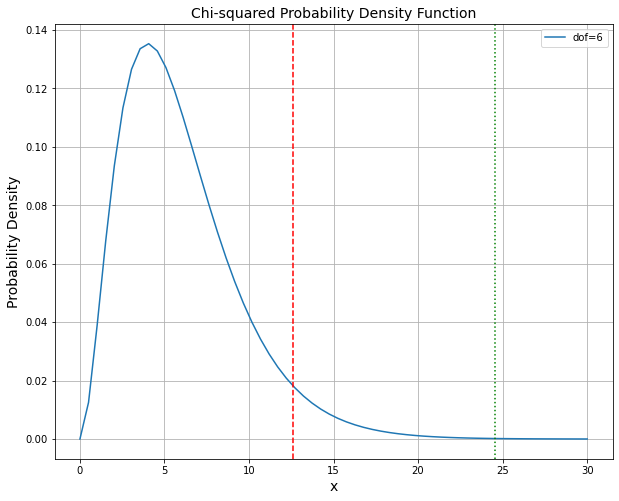

In [7]:
# Draw 100 samples from a chi-squared distribution with 6 degrees of freedom
# np.random.chisquare(6,100)
x = np.linspace(0, 30, 60)

# Plot probability density fn for chi-squared
plt.plot(x, ss.chi2.pdf(x, 6), label="dof=6")
# plt.plot(x, ss.chi2.pdf(x, 3), label="dof=3")
plt.xlabel('x', fontsize='14')
plt.ylabel('Probability Density', fontsize='14')
plt.title('Chi-squared Probability Density Function', fontsize='14')
plt.grid()
plt.legend()
# Add this line to show location of critical value and our test statistic after calc.
plt.axvline(x=12.592, color='r', linestyle='--')
plt.axvline(x=24.571, color='g', linestyle=':')

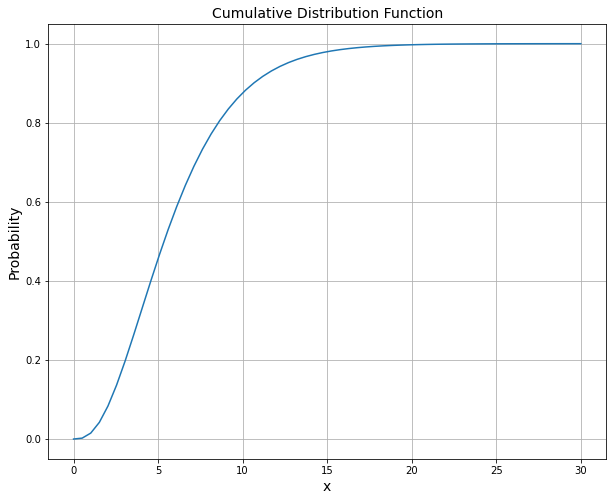

In [8]:
# Plot the cumulative distribution function for chi2 with dof=6 over x
plt.plot(x, ss.chi2.cdf(x, 6))
plt.xlabel('x', fontsize='14')
plt.ylabel('Probability', fontsize='14')
plt.title('Cumulative Distribution Function', fontsize='14')
plt.grid()
#plt.axvline(x=12.592, color='r', linestyle='--')

In [9]:
# Comment all of this out as can't relate it directly to our analysis below

## https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html
## Array of probabilities in range 0 - 1
#vals = ss.chi2.ppf([0.001, 0.5, 0.999], 6)
#print(vals)
## NumPy allcose Returns True if two arrays are element-wise equal within a tolerance
#np.allclose([0.001, 0.5, 0.999], ss.chi2.cdf(vals, 6))

Fortunately we can use the SciPy.stats package to perform all the calculations required to test our null hypothesis <span style='color:green'> [10 scipystats] </span>. Here, I will follow the analysis in <span style='color:green'> [11 MLM] </span> as the author explains very well what is happening.

In [10]:
# Create the contingency table for our example
white = [90, 60, 104, 95] # Array containing Row 1 of the table
blue = [30, 50, 51, 20] # Row 2 of the table
none = [30, 40, 45, 35] # Row 3 of the table
Ctable = [white, blue, none]
print('Contingency Table')
print(Ctable)

# Calculate test statistic, p-value, degrees of freedom, and expected values.
stat, p, dof, expected = ss.chi2_contingency(Ctable)
print('\nTest statistic = %.3f' % stat)
print('Degrees of freedom = %d' % dof)
print(f'p-value = {p:.5f}')
print('\nTable of expected frequency values:')
print(expected)

# Chose a significance level: 5%
prob = 0.95

# Percent point function (inverse of cdf — percentiles).
# Given our chosen significance level (5%), calculate the critical value of the test statistic
# using the ppf of a chi2 distribution.
critical = ss.chi2.ppf(prob, dof)
print('\nprobability = %.3f, critical = %.3f, stat = %.3f' % (prob, critical, stat))

Contingency Table
[[90, 60, 104, 95], [30, 50, 51, 20], [30, 40, 45, 35]]

Test statistic = 24.571
Degrees of freedom = 6
p-value = 0.00041

Table of expected frequency values:
[[ 80.53846154  80.53846154 107.38461538  80.53846154]
 [ 34.84615385  34.84615385  46.46153846  34.84615385]
 [ 34.61538462  34.61538462  46.15384615  34.61538462]]

probability = 0.950, critical = 12.592, stat = 24.571


### What do these results mean? 
1. We chose a significance level of 0.05 for our hypothesis test and our calculated p-value is 0.00041. Recall that the null hypothesis is that there is no relationship between the categorical variables Occupation and Neighborhood. Our p-value < 0.05, so must reject the null hypothesis, and we cannot rule out a relationship between Occupation and Neighborhood. The categorical variables are not independent <span style='color:green'> [12 statJim] </span>.
2. Note that we get the same result as above if we feed our test statistic, dof, and significance level (0.05) into an online p-value calculator which reports that "The P-Value is .000405. The result is significant at p < .05" <span style='color:green'> [7 pcalc].
3. What do our results mean in terms of critical values? It can also be used as a threshold to interpret the results of a statistical test <span style='color:green'> [13 MLM2]. </span> We have calculated a critical value of 12.592 and a test statistic of 24.571. As our calculated test statistic is > the critical value, we must reject the null hypothesis. The critical value is just an alternative to using p-values to test a hypothesis. On our plot of pdf for a Chi-squared distribution above, I have added lines marking the critical value and our test statistic. A value of x (the test statistic) > 12.592 is very unlikely if the null hypothesis holds; therefore we reject it.
4. Note that there are certain conditions which must hold for the test to be valid:
    - Observed values are obtained by random sampling.
    - Variables are categorical.
    - The numbers must be large i.e. counts $\geq 5$ in the table cells (both observed and expected values). Note that I did find references which contained much more precise conditions depending on the table size, particular flavor of test etc., but that level of detail is not required for this task <span style='color:green'> [14 assumeChi2]. </span>

### Errors
Two types of error are possible with a statistical test <span style='color:green'> [15 minitab, 16 KAsig] </span>: 
- a Type I error happens when the null hypothesis is actually true but you reject it.
- a Type II error happens when the null hypothesis is actually false and you fail to reject it.

The probability of making a type I error is equal to the significance level we chose above, p = 0.05. That means that there is a 5% chance we were wrong when we rejected the null hypothesis above. We could reduce the probability of making a type I error by choosing a lower significance level for our test. However, if we do that it becomes more difficult to reject the null hypothesis, leading to type II errors. We can reduce the probability of making a type II error by choosing a higher significance level for our test, making it easier to reject the null hypothesis. However, this will lead to a higher probability of a type I error as just discussed. So the type I and type II errors are playing against each other through the significance level chosen. The important thing is to think carefully about what type of error is most serious, in your particular situation, and to mitigate against it in your choice of significance level. For example, in cancer detection, a missed diagnosis of cancer has far more serious consequences than a false diagnosis. In our data, neither type of error is serious.

### Conclusion for Task 2
- We confirmed that the value of the Chi-squared test statistic for the provided contingency table is 24.571. This corresponds to a p-value of 0.00041 at a significance level of 5%. We therefore reject the null hypothesis that the categorical variables are independent.
- In machine learning Chi-squared tests can be used to check for relationships between categorical variables; is the expected output (in a classification application perhaps) dependent on a particular input feature? This can be used for feature selection when there are lots of features available, so that important input features are retained in the model but irrelevant ones are discarded.

### References for Task 2
<span style='color:green'> [1 wiki chi2] </span> Wikipedia; Chi-squared test; https://en.wikipedia.org/wiki/Chi-squared_test (Accessed 1 Nov. 2020).

<span style='color:green'> [2 stathow] </span> Stephanie Glen, *Contingency Table: What is it used for?*, From StatisticsHowTo.com: Elementary Statistics for the rest of us!, https://www.statisticshowto.com/what-is-a-contingency-table/, (Accessed 9 Nov. 2020).

<span style='color:green'> [3 catv] </span> What is the Difference Between Categorical, Ordinal and Numerical Variables?, UCLA: Statistical Consulting Group, https://stats.idre.ucla.edu/other/mult-pkg/whatstat/what-is-the-difference-between-categorical-ordinal-and-numerical-variables/, (Accessed 9 Nov. 2020).

<span style='color:green'> [4 ssChi2] </span> Using Chi-Square Statistic in Research, Statistics Solutions, https://www.statisticssolutions.com/using-chi-square-statistic-in-research/ (Accessed 10 Nov. 2020).

<span style='color:green'> [5 mathfun] </span> Chi-Square Test, Math is Fun, https://www.mathsisfun.com/data/chi-square-test.html (Accessed 12 Nov. 2020).

<span style='color:green'> [6 pval] </span> What a p-Value Tells You about Statistical Data, dummies.com/, https://www.dummies.com/education/math/statistics/what-a-p-value-tells-you-about-statistical-data/ (Accessed 10 Nov. 2020).

<span style='color:green'> [7 pcalc] </span> P Value from Chi-Square Calculator, Social Science Statistics, https://www.socscistatistics.com/pvalues/chidistribution.aspx (accessed 12 Nov. 2020).

<span style='color:green'> [8 numpy] </span> NumPy; numpy.random.chisquare; https://numpy.org/doc/stable/reference/random/generated/numpy.random.chisquare.html,  (Accessed Nov. 2020).

<span style='color:green'> [9 distros] </span> Distributions, pytoLearn: School of Informatics Aristotle University of Thessaloniki, http://pytolearn.csd.auth.gr/d1-hyptest/11/distros.html (Accessed 16 Nov. 2020).

<span style='color:green'> [10 scipystats] </span> Statistical functions (scipy.stats), SciPy, https://docs.scipy.org/doc/scipy/reference/stats.html, (Accessed Nov. 2020).

<span style='color:green'> [11 MLM] </span> A Gentle Introduction to the Chi-Squared Test for Machine Learning; Machine Learning Mastery; https://machinelearningmastery.com/chi-squared-test-for-machine-learning/ (Accessed 6 Nov. 2020).

<span style='color:green'> [12 statJim] </span> Chi-Square Test of Independence and an Example, Statistics by Jim, https://statisticsbyjim.com/hypothesis-testing/chi-square-test-independence-example/#:~:text=For%20a%20Chi%2Dsquare%20test,exists%20between%20the%20categorical%20variables (Accessed Nov. 2020).

<span style='color:green'> [13 MLM2] </span> How to Calculate Critical Values for Statistical Hypothesis Testing with Python, Machine Learning Mastery, https://machinelearningmastery.com/critical-values-for-statistical-hypothesis-testing/ (Accessed Nov. 2020).

<span style='color:green'> [14 assumeChi2]. </span> Assumptions/Restrictions for Chi-square Tests on Contingency Tables, Bruce Weaver at LakeHead University CA, https://sites.google.com/a/lakeheadu.ca/bweaver/Home/statistics/notes/chisqr_assumptions (Accessed 17 Nov. 2020).

<span style='color:green'> [15 minitab] </span> Minitab Express, What are type I and type II errors?, https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/basic-statistics/inference/supporting-topics/basics/type-i-and-type-ii-error/ (Accessed 17 Nov. 2020).

<span style='color:green'> [16 KAsig] </span> Consequences of errors and significance, Khan Academy, https://www.khanacademy.org/math/ap-statistics/tests-significance-ap/error-probabilities-power/a/consequences-errors-significance (Accessed 17 Nov. 2020).

Not used. <span style='color:green'> [MLM3] </span> Continuous Probability Distributions for Machine Learning, Machine Learning Mastery, https://machinelearningmastery.com/continuous-probability-distributions-for-machine-learning/#:~:text=The%20probability%20of%20an%20event,or%20equal%20to%20a%20probability. (Accessed 16 Nov. 2020).

## 3: Research the difference between Microsoft Excel STDEV.P and STDEV.S functions
***

### Introduction

We have been asked to research the difference between two Microsoft Excel formulae which can be used to calculate the standard deviation, $\sigma$, of an array of n numbers. STDEV.S assumes that its arguments are a sample of the population and has (n-1) in the formula denominator, while STDEV.P is used if the data represents the entire population, and has a denominator of just n <span style='color:yellow'> [1 MOhelp] </span>. Why the difference in the formulae? My first thought is that if n is very large, surely the difference between these two functions is negligible, so why would it matter which one you use? However, If n is small I can see how it might make a difference to the calculated standard deviation. Lets explain some of the terms. I'll try to keep this task short :)

### Standard deviation
The standard deviation measures the variation or spread in a set of numbers/values <span style='color:yellow'> [2 wikiSD] </span>. If the standard deviation is small, the numbers tend to cluster around the mean or average value. If it is large, the numbers are more spread out, with some being very far away from the mean value. 

The usual formula for the standard deviation of a sample of n numbers is:
$$\sigma_s = \sqrt{ \frac{1}{n-1} \sum_{i=1}^{n} \big( x_i - \bar{x} \big)^2 }$$
where ${x_1, x_2, ..., x_n}$ are the numbers and $\bar{x}$ is their mean. This is the *sample standard deviation*. What we are doing is measuring how far each number $x_i$ is from the mean $\bar{x}$, squaring that difference, and then adding up all of the squared differences for every number in the sample. The differences are squared so that negative and positive differences don't cancel each other out in the summation. We then divide by $n-1$ and take the square root of the result. One can see from this formula that if numbers are close to the mean, the resulting standard deviation will be small, and vice versa. This formula assumes that our set of numbers is only a sample of numbers taken from all the numbers in the world. For example, the iris data set we have come across before contains 150 measurements of petal length. This is only a random sample of the full iris population, and we must use the formula above when calculating standard deviation. If we could somehow measure petal length for every iris flower, we would have the full population (lets call it N), and could use the formula for *population standard deviation*:
$$\sigma_p = \sqrt{ \frac{1}{N} \sum_{i=1}^{N} \big( x_i - \bar{x} \big)^2 }$$.

As sample size increases, the difference between the two formulae decreases because we are obtaining more information about our population when we take a bigger sample from it. I'll illustrate this with a plot. We have already imported NumPy and Matplotlib for task 2 so don't need to again.

sample stdev = 0.1123 for population with $\sigma$ = 0.1
difference = 12.30%
sample stdev = 0.0491 for population with $\sigma$ = 0.05
difference = -1.71%


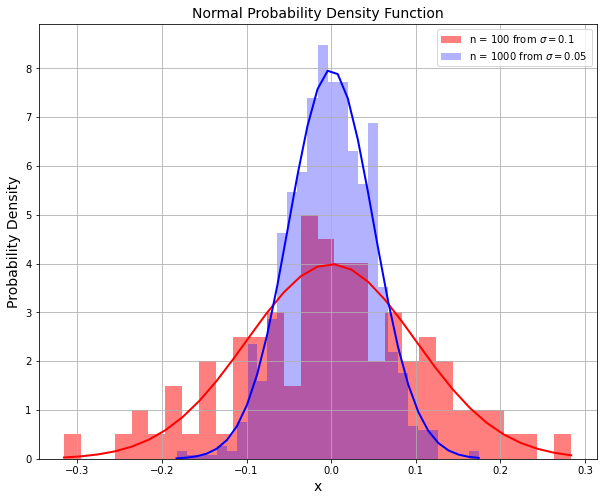

In [11]:
# Taken & adapted from:
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

#  Set mean and standard deviation values
mu, sigma1, sigma2 = 0, 0.1, 0.05

# Draw a sample form a normal distribution with sd = sigma1
s = np.random.normal(mu, sigma1, 100)
# Calcualte sample sd using n-1
s_sd = np.sqrt( np.sum((s - np.mean(s))**2)/(len(s) - 1))
# Difference between sample sd and pop sd
s_e = ((s_sd - sigma1)/sigma1) * 100
print(f'sample stdev = {s_sd:.4f} for population with $\sigma$ = {sigma1}')
print(f'difference = {s_e:.2f}%')

# Plot a histogram of this sample
count, bins, ignored = plt.hist(s, 30, density=True, color='r', alpha=0.5, label='n = 100 from $\sigma = 0.1$')

# Now plot the probability density function for a normal distribution sd = sigma1
# This is a population, from which samples can be drawn
plt.plot(bins, 1/(sigma1 * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma1**2) ), linewidth=2, color='r')

# Draw a sample form a normal distribution with sd = sigma2
s2 = np.random.normal(mu, sigma2, 1000)
# Calcualte sample sd using n-1
s2_sd = np.sqrt( np.sum((s2 - np.mean(s2))**2)/(len(s2) - 1))
# Difference between sample sd and pop sd
s2_e = ((s2_sd - sigma2)/sigma2) * 100
print(f'sample stdev = {s2_sd:.4f} for population with $\sigma$ = {sigma2}')
print(f'difference = {s2_e:.2f}%')

# Plot a histogram of this sample
count, bins, ignored = plt.hist(s2, 30, density=True, color='b', alpha=0.3, label='n = 1000 from $\sigma = 0.05$')

# Now plot the probability density function for a normal distribution with different sd = sigma2
plt.plot(bins, 1/(sigma2 * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma2**2) ), linewidth=2, color='b')
plt.xlabel('x', fontsize='14')
plt.ylabel('Probability Density', fontsize='14')
plt.title('Normal Probability Density Function', fontsize='14')
plt.grid()
plt.legend()
plt.show()

What does this mean? The blue curve represents a population that follows a normal distribution having mean 0 and standard deviation 0.05. The red curve represents another population that also follows a normal distribution with the same mean, but has a larger standard deviation of 0.1. Note how the red curve is more spread out than the blue one. We have alluded to samples and populations, but here the histograms represent samples taken from the blue and red distributions. We have taken only 100 random samples from the red curve to generate the red histogram, but 1000 samples from the blue curve to generate the blue histogram. Note how the blue histogram is closer to the blue curve because we have taken more samples from that population. So few samples have been generated for the red histogram that it would be difficult to guess the population from which they are drawn sometimes.

The standard deviation provides information about how much of our population or sample lies close to the mean value. For example, with the normal distribution we have just looked at, 68.27% of values lie within $\pm 1 \sigma$ of the mean; 95.45% of values lie within $\pm 2 \sigma$; and 99.99% of values lie within $\pm 3 \sigma$. This means that for a normal distribution, values more that $3\sigma$ away from the mean are very unlikely to occur. This is shown in the plot below. The standard deviation has applications in many fields. It can be used to show volatility in a share price, for example, or the margin of error in an opinion poll before an election. I'm more familiar with it as a measure of the accuracy of results obtained in a physical experiment and as a way to express how well a theoretical model can fit those results.

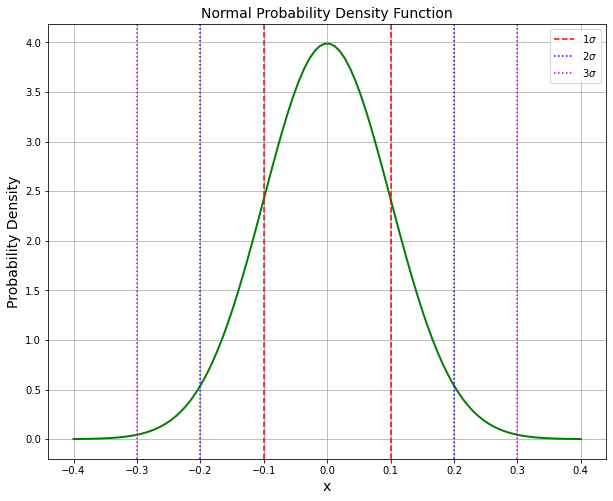

In [12]:
#  Set mean and standard deviation values
m, s = 0, 0.1
x = np.linspace(mu - 4*s, m + 4*s, 100)
plt.plot(x, 1/(s * np.sqrt(2 * np.pi)) * np.exp( - (x - m)**2 / (2 * s**2) ), linewidth=2, color='g')
plt.xlabel('x', fontsize='14')
plt.ylabel('Probability Density', fontsize='14')
plt.title('Normal Probability Density Function', fontsize='14')
plt.axvline(x=-0.1, color='r', linestyle='--')
plt.axvline(x=0.1, color='r', linestyle='--', label='$1\sigma$')
plt.axvline(x=-0.2, color='b', linestyle=':')
plt.axvline(x=0.2, color='b', linestyle=':', label='$2\sigma$')
plt.axvline(x=-0.3, color='m', linestyle=':')
plt.axvline(x=0.3, color='m', linestyle=':', label='$3\sigma$')
plt.legend()
plt.grid()

### Samples versus Populations 
What's the difference between a population and a sample, and why use one rather than the other? In statistics the word **population** is used to describe the total group being investigated. For example, if we wished to investigate the distribution of heights of all adult females in Ireland, then our population would be "all adult females in Ireland". Now, it would be very impractical to go out and measure the heights of all adult females in Ireland, so it is more likely that a random **sample** of those would be chosen for investigation. Care would need to be taken to ensure that the random sample was indeed representative of the population. If we only included in our sample female students of a single university say, we would be inadvertently excluding women older than about 22 years, or women from certain socio-economic or ethnic backgrounds. Our choice of sample may bias our results. The size of the sample is always smaller than the size of the population <span style='color:yellow'> [3 scribbr] </span>. This reference gives examples of populations and samples. For example, a population might be all songs from the Eurovision Song Contest (it doesn't have to refer exclusively to people), and a sample might be winning songs from that contest which were performed in English. We use samples rather than full populations for a variety of reasons: out of necessity if the population is very large or inaccessible, if it's geographically dispersed, for cost reasons, or if we want to keep our dataset to a manageable size. A population is just all of whatever you are interested in, for example, the age of all cars in your housing estate; a sample might be just the cars on your street. The Central Statistics Office in Ireland conducts a census of everybody who is in the country on Census night <span style='color:yellow'> [4 CSO] </span>. This happens only once every four years because it is such a big undertaking (the 2020 Census has been postponed to 2022 because of the Coronavirus pandemic). The census counts everybody to establish population size and other metrics. 

### STDEV.P and STDEV.S 22/11/20
Why the different formulae for population and sample standard deviations? I hadn't really thought too much about it to be honest. The population standard deviation is a parameter which is calculated from the entire population and has a fixed value <span style='color:yellow'> [5 thought] </span>. The sample standard deviation is a statistic which is calculated from only _some_ of the individuals in a population; it depends on the sample chosen, and so it can vary. The standard deviation of the sample is greater than the standard deviation of the population. In a hand wavy way, having (n-1) in the denominator will give a larger value for standard deviation than having only n in the denominator. This is especially true if n is small. As n tends towards infinity, the gap between the formulae closes. We will sometimes refer to the variance, which is just the standard deviation squared, $\sigma^2$.

But why exactly $1/(n-1)$ for a sample versus $1/N$ for a population? I found some Khan Academy videos which attempt to explain the intuition behind it <span style='color:yellow'> [6 KAintuition] </span>, although I ended up just following a trail of videos showing simulations where $\sigma^2$ is repeatedly calculated for different samples of size n taken from a population of size N with population mean $\mu$. By plotting the difference between the variance calculated using the sample mean $\bar{x}$ and that calculated using the true population mean $\mu$, they showed that having n in the denominator always underestimated the true population variance; it is a biased estimator of the variance <span style='color:yellow'> [7 KAn-1] </span>. By placing n-1 in the denominator, they sometimes overestimate the variance, sometimes underestimate it, but on average, it is an unbiased estimate of population variance. In the screen grab below the red curves are the biased estimates (n) and the blue curves are the unbiased estimates (n-1). A bias is a tendency to push a result or calculation in one direction only. The curves on the left show the variances calculated repeatedly for more and more samples of fixed size n. As the number of samples (of size n) taken increases, the cumulative unbiased variance approaches the true population variance, but the biased variance approaches a limit which is an underestimate of it. The curves on the right show the difference between variances calculated using sample and true means that I mentioned above. They also showed a simulation with n-2 in the denominator and this also provided a biased estimator of the true population variance, but it overestimated that quantity.

<figure>
    <img src="img/KAbiased.JPG" >
    <figcaption>Screen grab from video in <span style='color:yellow'> [7 KAn-1] </span> </figcaption>
</figure>

The Wikipedia article on standard deviation goes into a lot of detail about unbiased estimators in the estimation section of the article <span style='color:yellow'> [2 wikiSD] </span>. I'll summarize briefly here. They explain how the unbiased estimator (with just n) is usually fine to use for very large sample sizes as the bias is less than 1% if n > 75. Using n-1 to calculate an unbiased estimator of variance ($\sigma^2$) is called Bessel's correction. However, the standard deviation is obtained by taking the square root of $\sigma^2$, and this operation re-introduces bias. So the standard deviation calculated using n-1 is still really a biased estimator of the population standard deviation, although it is less biased than if n is used in the formula. As sample size n increases, the amount of bias decreases. Finally, the article states that no one formula provides an unbiased estimate of standard deviation for **all** distributions (in contrast to mean and variance); the correction factor depends on the particular distribution. Our formula for $\sigma_s$ is really the corrected sample standard deviation rather than a true unbiased estimator of the population standard deviation.

Hopefully this will become clearer in my own simulation.

### Simulation
I'll start by following roughly the procedure I found in a Khan Academy video<span style='color:yellow'> [8 KAsim]. </span>

Population mean = 0.46864, standard deviation = 0.28443


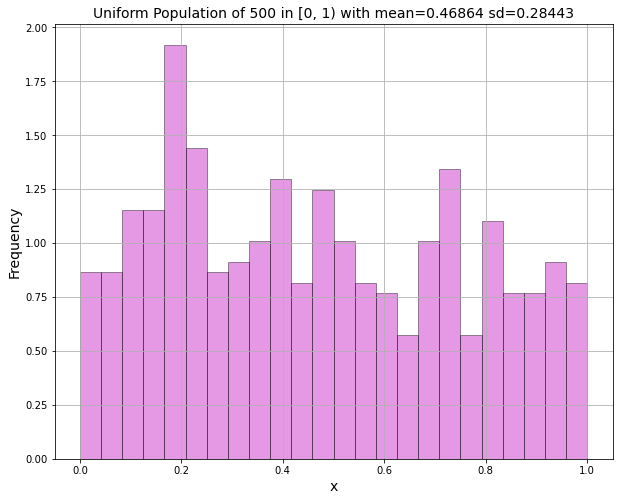

In [13]:
# First generate a population (from a normal distribution) of size Np, mean mp, standard deviation sp
# Fix the parameters of the population
# mp, sp, Np = 0, 0.1, 500 # mean, standard deviation, pop size
# pop = np.random.normal(mp, sp, Np)
# xp = np.linspace(mp - 4*sp, mp + 4*sp, 100)
# count, bins, ignored = plt.hist(pop, xp, density=True)

# Try a uniform distribution instead for a change .
# numpy.random.uniform(low=0.0, high=1.0, size=None) includes low, excludes high
l, h, Np = 0, 1, 500 # set low, high, and size of population.
pop = np.random.uniform(l, h, Np)

# Calculate the parameters of this population.
mp = np.mean(pop)
sp = np.sqrt( np.sum((pop - np.mean(pop))**2)/(len(pop)))
print(f'Population mean = {mp:.5f}, standard deviation = {sp:.5f}')

# Check all in range.
np.all(pop >= l)
np.all(s < h)

# Plot a histogram of our population.
xp = np.linspace(l, h, 25) # bins
count, bins, ignored = plt.hist(pop, xp, color='m', edgecolor='k', density=True, alpha=0.4)
plt.xlabel('x', fontsize='14')
plt.ylabel('Frequency', fontsize='14')
plt.title(f'Uniform Population of {Np} in [0, 1) with mean={mp:.5f} sd={sp:.5f}', fontsize='14')
#plt.legend()
plt.grid()

Now, I need to worry about sampling from this population. I'll take a single sample first. I probably want to take many samples of size n and calculate cumulative standard deviation as I go. See which formula is more accurate. Might do for a few sample sizes - prob loop and put results in a df.

In [14]:
# Sample size.
n = 100
# numpy.random.choice(a, size=None, replace=True, p=None)
# Generates a random sample from a given 1-D array
# I'll sample without replacement as once a sample is taken from the population, it's gone.
sam = np.random.choice(pop, size=n, replace=False)
# print(sam)
# Calculate sample sd using biased & unbiased formulae
SDb = np.sqrt( np.sum((sam - np.mean(sam))**2)/(len(sam))) # Biased SD
SDub = np.sqrt( np.sum((sam - np.mean(sam))**2)/(len(sam) - 1)) # Unbiased SD
print(f'Sample mean = {np.mean(sam):.5f}')
print(f'Biased Standard Deviation = {SDb:.5f}; Unbiased Standard Deviation = {SDub:.5f}')

Sample mean = 0.45246
Biased Standard Deviation = 0.29364; Unbiased Standard Deviation = 0.29512


### References for Task 3
<span style='color:yellow'> [1 MOhelp] </span> STDEV.S function, Microsoft Office Support, https://support.microsoft.com/en-us/office/stdev-s-function-7d69cf97-0c1f-4acf-be27-f3e83904cc23#:~:text=Remarks-,STDEV.,P. (Accessed 19 Nov. 2020).

<span style='color:yellow'> [2 wikiSD] </span> Wikipedia, Standard deviation, https://en.wikipedia.org/wiki/Standard_deviation (Accessed 19 Nov. 2020).

<span style='color:yellow'> [3 scribbr] </span> Population vs sample: what’s the difference?, Scribbr, https://www.scribbr.com/methodology/population-vs-sample/#:~:text=A%20population%20is%20the%20entire,total%20size%20of%20the%20population. (Accessed 19 Nov. 2020).

<span style='color:yellow'> [5 thought] </span> Differences Between Population and Sample Standard Deviations, ThoughtCo., https://www.thoughtco.com/population-vs-sample-standard-deviations-3126372#:~:text=A%20sample%20standard%20deviation%20is,than%20that%20of%20the%20population. (Accessed 19 Nov. 2020).

<span style='color:yellow'> [4 CSO] </span> The Census, Central Staistics Office, https://www.cso.ie/en/census/. (Accessed 22 Nov. 2020).

<span style='color:yellow'> [6 KAintuition] </span> Review and intuition why we divide by n-1 for the unbiased sample variance, Khan Academy, https://www.khanacademy.org/math/ap-statistics/summarizing-quantitative-data-ap/more-standard-deviation/v/review-and-intuition-why-we-divide-by-n-1-for-the-unbiased-sample-variance (Accessed 22 Nov. 2020).

<span style='color:yellow'> [7 KAn-1] </span> Simulation providing evidence that (n-1) gives us unbiased estimate, Khan Academy, https://www.khanacademy.org/math/ap-statistics/summarizing-quantitative-data-ap/more-standard-deviation/v/simulation-providing-evidence-that-n-1-gives-us-unbiased-estimate (Accessed 23 Nov. 2020).

<span style='color:yellow'> [8 KAsim] </span> Simulation showing bias in sample variance, Khan Academy, https://www.khanacademy.org/math/ap-statistics/summarizing-quantitative-data-ap/more-standard-deviation/v/simulation-showing-bias-in-sample-variance (Accessed 23 Nov. 2020).

To do:
- numpy illustrate
- pop mean = par = mu, sample mean = statistic = xbar
- calc xbar for histos above = mu = 0? Yes and say it's been added.
- ignored = ? in histo